In [ ]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install opencage pandas

     ---------------------------------------- 0.0/69.9 kB ? eta -:--:--
     ----------------------------------- ---- 61.4/69.9 kB 1.7 MB/s eta 0:00:01
     ---------------------------------------- 69.9/69.9 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/436.5 kB ? eta -:--:--
   --------------------------------------  430.1/436.5 kB 13.5 MB/s eta 0:00:01
   ---------------------------------------- 436.5/436.5 kB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
   ---------------------------------------- 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/90.1 kB ? eta -:--:--
   ---------------------------------------- 90.1/90.1 kB ? eta 0:00:00
  Attempting uninstall: yarl
    Found existing installation: yarl 1.9.3
    Uninstalling yarl-1.9.3:
      Successfully uninstalled yarl-1.9.3
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.9.5
    Uninstalling aiohttp-

  You can safely remove it manually.
  You can safely remove it manually.


In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from opencage.geocoder import OpenCageGeocode
import time

In [2]:
trreb_data = pd.read_csv('TRREB_data_cleaned.csv')

In [8]:
trreb_data.head()

,address,beds,baths,type,price,sqft,listing#,sqft_min,sqft_max,sqft_avg,Type,Style
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947,1000,1199,1099.5,Condo Townhouse,Multi-Level
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099,1200,1399,1299.5,Condo Townhouse,3-Storey
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570,1400,1599,1499.5,Condo Townhouse,Stacked Townhse
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655,1200,1399,1299.5,Condo Apartment,2-Storey
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767,1000,1199,1099.5,Condo Apartment,Multi-Level


In [ ]:
trreb_data.shape

(3356, 12)

In [13]:
# Split dataset into chunks of 2500 rows
chunk_size = 2500
chunks = [trreb_data.iloc[i:i+chunk_size] for i in range(0, len(trreb_data), chunk_size)]

# Save each chunk to a separate file
for i, chunk in enumerate(chunks):
    chunk.to_csv(f"chunk_{i+1}.csv", index=False)
    print(f"Saved chunk_{i+1}.csv with {len(chunk)} rows.")

Saved chunk_1.csv with 2500 rows.
Saved chunk_2.csv with 856 rows.


In [19]:
# Your OpenCage API key
API_KEY = "4dcebf05754f49aca3cfc2ea8be615ef"
geocoder = OpenCageGeocode(API_KEY)

# Load a chunk to geocode (replace 'chunk_1.csv' with the actual file name)
data_chunk = pd.read_csv("chunk_1.csv")

# Function to get latitude and longitude
def get_lat_lon(address, retries=3):
    for attempt in range(retries):
        try:
            results = geocoder.geocode(address)
            if results:
                location = results[0]['geometry']
                return location['lat'], location['lng']
            else:
                return None, None
        except Exception as e:
            if attempt < retries - 1:
                time.sleep(1)  # Wait before retrying
            else:
                print(f"Error for address '{address}': {e}")
                return None, None

# Apply geocoding to the address column
data_chunk[['Lat', 'Lon']] = data_chunk['address'].apply(lambda x: pd.Series(get_lat_lon(x)))

# Save the geocoded chunk to a new CSV file
data_chunk.to_csv("geocoded_chunk_1.csv", index=False)
print("Geocoding complete for chunk 1. Saved to 'geocoded_chunk_1.csv'.")

Geocoding complete for chunk 1. Saved to 'geocoded_chunk_1.csv'.


In [20]:
trreb_data_geocoded_1 = pd.read_csv('geocoded_chunk_1.csv')

In [ ]:
trreb_data_geocoded_1.head()

,address,beds,baths,type,price,sqft,listing#,sqft_min,sqft_max,sqft_avg,Type,Style,Lat,Lon
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947,1000,1199,1099.5,Condo Townhouse,Multi-Level,43.700110,-79.416300
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099,1200,1399,1299.5,Condo Townhouse,3-Storey,43.777750,-79.283306
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570,1400,1599,1499.5,Condo Townhouse,Stacked Townhse,43.772663,-79.190300
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655,1200,1399,1299.5,Condo Apartment,2-Storey,43.749223,-79.515943
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767,1000,1199,1099.5,Condo Apartment,Multi-Level,43.592712,-79.542497


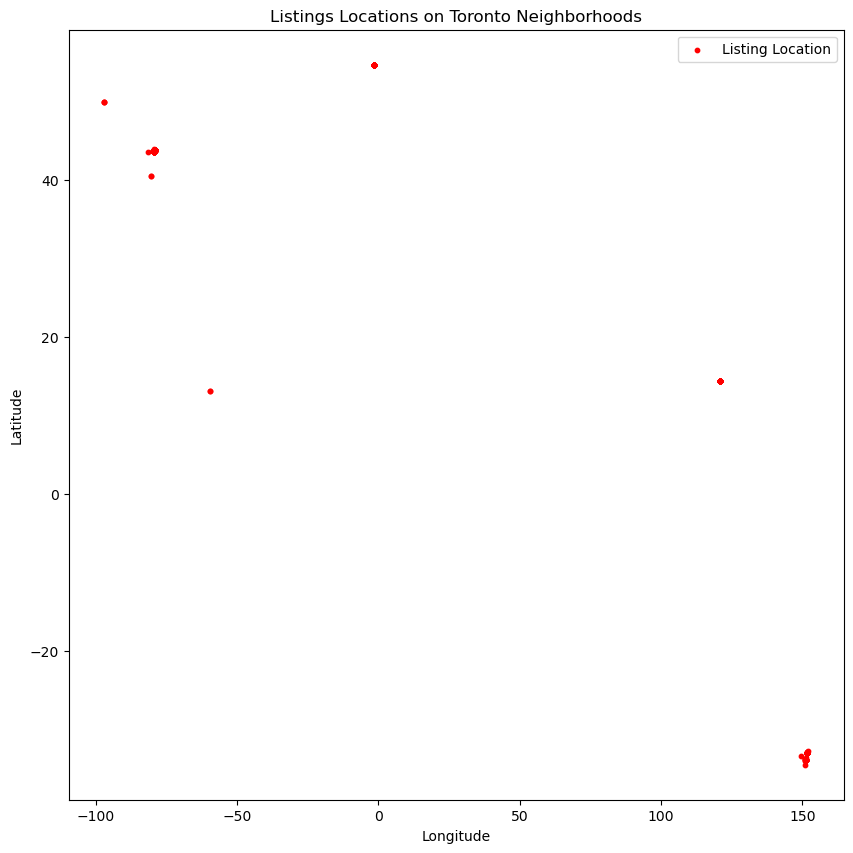

In [30]:
# Load the shapefile (use the path to the .shp file)
#neighbourhoods = gpd.read_file('Neighbourhoods - 4326.shp')

# Plot neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
#neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Plot listings' locations
plt.scatter(trreb_data_geocoded_1['Lon'],trreb_data_geocoded_1['Lat'], color='red', s=10, label="Listing Location")

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Listings Locations on Toronto Neighborhoods")

plt.show()

In [ ]:
# # Combine all geocoded chunks
# import glob

# # Get a list of all geocoded chunk files
# chunk_files = glob.glob("geocoded_chunk_*.csv")

# # Combine them into a single DataFrame
# combined_data = pd.concat([pd.read_csv(chunk) for chunk in chunk_files], ignore_index=True)

# # Save the final combined dataset
# combined_data.to_csv("final_geocoded_data.csv", index=False)
# print("All chunks combined and saved to 'final_geocoded_data.csv'.")